<h2>Лабораторная работа №5 по курсу "Проектирование интеллектуальных систем"</h2>

<p><b>Выполнил:</b> Саврасов П.А. группа ИУ5-24М</p>

<h3>Задание</h3>
<p>На основе приведенного кода нужно выполнить 3 упраженения. Для успешного запуска нужно структурировать код следующим образом:</p>
<ol>
    <li>Генерация данных (процедуры генерации данных приведены в приложении)</li>
    <li>Определение параметров нейросети</li>
    <li>Описание графа вычислений</li>
    <li>Описание функции потерь и оптимизатора</li>
    <li>Обучение и валидация нейронной сети</li>
    <li>Визуализация результатов (динамика ошибки на обучающей и тестовой выборке по итерациям и визуализация предсказаний)</li>
</ol>
<h4>Упражнение 1</h4>
В упражнении 1 имеется 2 временных ряда, которые связаны вместе. Это также можно интерпретировать как двумерный временной ряд. Для выполнения упражнения 1 требуется просто собрать код из приведенных частей и запустить его.
<h4>Упражнение 2</h4>
В упражнении 2 имеется 1 сигнал, который является суперпозицией двух синусоид с разным периодом и смещением. Чтобы получить корректные предсказания, необходимо изменить гиперпараметры нейронной сети.
<h4>Упражнение 3</h4>
Упражнение 3 аналогично упражнению 2, однако входные данные зашумлены. Здесь также нужно
будет настроить гиперпараметры нейронной сети, чтобы получить корректные предсказания.


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import random
import math

Генератор данных для упражнения 1

In [6]:
def generate_x_y_data_v1(isTrain, batch_size):
    seq_length = 10
    batch_x = []
    batch_y = []
    for _ in range(batch_size):
        rand = random.random() * 2 * math.pi
        sig1 = np.sin(np.linspace(0.0 * math.pi + rand, 3.0 * math.pi + rand, seq_length * 2))
        sig2 = np.cos(np.linspace(0.0 * math.pi + rand, 3.0 * math.pi + rand, seq_length * 2))
        
        x1 = sig1[:seq_length]
        y1 = sig1[seq_length:]
        x2 = sig2[:seq_length]
        y2 = sig2[seq_length:]
        
        x_ = np.array([x1, x2])
        y_ = np.array([y1, y2])
        x_, y_ = x_.T, y_.T
        
    batch_x.append(x_)
    batch_y.append(y_)
    
    batch_x = np.array(batch_x)
    batch_y = np.array(batch_y)
    batch_x = np.array(batch_x).transpose((1, 0, 2))
    batch_y = np.array(batch_y).transpose((1, 0, 2))
    return batch_x, batch_y

Генератор данных для упражнения 2

In [11]:
def generate_x_y_data_v2(isTrain, batch_size, seq_length = 15):
    batch_x = []
    batch_y = []
    for _ in range(batch_size):
        offset_rand = random.random() * 2 * math.pi
        freq_rand = (random.random() - 0.5) / 1.5 * 15 + 0.5
        amp_rand = random.random() + 0.1
        sig1 = amp_rand * np.sin(
            np.linspace(
                seq_length / 15.0 * freq_rand * 0.0 * math.pi + offset_rand,
                seq_length / 15.0 * freq_rand * 3.0 * math.pi + offset_rand,
                seq_length * 2
            )
        )
        
        offset_rand = random.random() * 2 * math.pi
        freq_rand = (random.random() - 0.5) / 1.5 * 15 + 0.5
        amp_rand = random . random () * 1.2
        sig1 = amp_rand * np.cos(
            np.linspace(
                seq_length / 15.0 * freq_rand * 0.0 * math.pi + offset_rand,
                seq_length / 15.0 * freq_rand * 3.0 * math.pi + offset_rand,
                seq_length * 2
            )
        ) + sig1
        
        x1 = sig1[:seq_length]
        y1 = sig1[seq_length:]
        x_ = np.array([x1])
        y_ = np.array([y1])
        x_, y_ = x_.T, y_.T
        
    batch_x.append(x_)
    batch_y.append(y_)
    batch_x = np.array(batch_x)
    batch_y = np.array(batch_y)
    
    batch_x = np.array(batch_x).transpose((1, 0, 2))
    batch_y = np.array(batch_y).transpose((1, 0, 2))
    return batch_x, batch_y


Генератор данных для упражнения 3

In [19]:
def generate_x_y_data_v3 (isTrain, batch_size):
    seq_length = 30
    x, y = generate_x_y_data_v2(isTrain, batch_size, seq_length=seq_length )
    noise_amount = random.random() * 0.15 + 0.10
    x = x + noise_amount * np.random.randn(seq_length, batch_size, 1)
    avg = np.average(x)
    std = np.std(x) + 0.0001
    x = x - avg
    y = y - avg
    x = x / std / 2.5
    y = y / std / 2.5
    return x, y

In [35]:
xSample, ySample = generate_x_y_data_v1(isTrain =True, batch_size =3)
seqLength = xSample.shape[0]
batchSize = 5
outputDim = inputDim = xSample.shape[-1]
hiddenDim = 12
layersStackedCount = 2
learningRate = 0.007
nbIters = 150
lrDecay = 0.92
momentum = 0.5
lambdaL2Reg = 0.003

In [120]:
inpLayer = keras.Input(shape=(None, 1))
hidLayer = inpLayer 

for i in range(layersStackedCount):
    hidLayer = layers.GRU(hiddenDim,
        return_sequences=True,
        activation='relu',
        kernel_regularizer=tf.keras.regularizers.L2(l2=lambdaL2Reg)    
    )(hidLayer)
    
outLayer = layers.Dense(1, activation='relu')(hidLayer)
model = keras.Model(inputs=inpLayer, outputs=outLayer)

In [121]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['mean_squared_error']
)

In [127]:
history = model.fit(sig1[:seq_length], sig1[:seq_length], verbose=2)

4/4 - 0s - loss: 0.0498 - mean_squared_error: 0.5441


In [128]:
xSample.shape

(10, 1, 2)

In [112]:
ySample.shape

(10, 1, 2)

In [55]:
def generate_x_y_data_v1_1(isTrain, batch_size):
    seq_length = 10
    batch_x = []
    batch_y = []
    for _ in range(batch_size):
        rand = random.random() * 2 * math.pi
        sig1 = np.sin(np.linspace(0.0 * math.pi + rand, 3.0 * math.pi + rand, seq_length * 2))
        sig2 = np.cos(np.linspace(0.0 * math.pi + rand, 3.0 * math.pi + rand, seq_length * 2))
        
        x1 = sig1[:seq_length]
        y1 = sig1[seq_length:]
        x2 = sig2[:seq_length]
        y2 = sig2[seq_length:]
        
        x_ = np.array([x1, x2])
        y_ = np.array([y1, y2])
        x_, y_ = x_.T, y_.T
        
    batch_x.append(x_)
    batch_y.append(y_)
    
    batch_x = np.array(batch_x)
    batch_y = np.array(batch_y)
    batch_x = np.array(batch_x).transpose((1, 0, 2))
    batch_y = np.array(batch_y).transpose((1, 0, 2))
    return np.array([batch_x, batch_y])

generate_x_y_data_v1_1(True, 10).shape

(2, 10, 1, 2)

<AxesSubplot:>

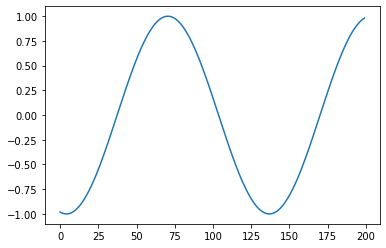

In [106]:
seq_length = 100
x = []
y = []

rand = random.random() * 2 * math.pi
sig1 = np.sin(np.linspace(0.0 * math.pi + rand, 3.0 * math.pi + rand, seq_length * 2))
sig2 = np.cos(np.linspace(0.0 * math.pi + rand, 3.0 * math.pi + rand, seq_length * 2))

x1 = sig1[:seq_length]
y1 = sig1[seq_length:]
x2 = sig2[:seq_length]
y2 = sig2[seq_length:]
x_ = np.array([x1, x2])
y_ = np.array([y1, y2])

x_, y_ = x_.T, y_.T
x = np.array(x_)
y = np.array(y_)
    
sns.lineplot(x=range(seq_length*2), y=sig1)

In [87]:
np.linspace(0.0 * math.pi + rand, 3.0 * math.pi + rand, seq_length * 2)

array([ 5.92180384,  6.41784478,  6.91388573,  7.40992667,  7.90596762,
        8.40200856,  8.89804951,  9.39409045,  9.8901314 , 10.38617234,
       10.88221329, 11.37825424, 11.87429518, 12.37033613, 12.86637707,
       13.36241802, 13.85845896, 14.35449991, 14.85054085, 15.3465818 ])

In [95]:
random.random() * 2 * math.pi # [0 ... 1] * 2 * 3.14 = [0, 6.28]

0.5120262881569343

In [98]:
np.linspace(rand, 3.0 * math.pi + rand, seq_length * 2)

array([ 5.92180384,  6.41784478,  6.91388573,  7.40992667,  7.90596762,
        8.40200856,  8.89804951,  9.39409045,  9.8901314 , 10.38617234,
       10.88221329, 11.37825424, 11.87429518, 12.37033613, 12.86637707,
       13.36241802, 13.85845896, 14.35449991, 14.85054085, 15.3465818 ])

In [119]:
print(history.params)

# check the keys of history object
print(history.history.keys())
history.history['loss']

{'verbose': 2, 'epochs': 1, 'steps': 4}
dict_keys(['loss', 'mean_squared_error'])


[0.03419271856546402]